<a href="https://colab.research.google.com/github/ENGCSS/TCC_Geoprocessamento/blob/main/Mapa%20Iterativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---
<br>

ESPECIALIZAÇÃO EM GEOPROCESSAMENTO — UFABC

Disciplina: Introdução à Programação para o Geoprocessamento

Polo Balneário São Francisco







---



---




Cristiano Stefani Selegrin —————————— 33202320813

Ozana Rebouças Silva ———————————— 33202320795

<br>

---



---




### 4.1.1 - Bibliotecas

In [5]:
!pip install unidecode -q
!pip install mapclassify -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.6 MB/s eta 0:00:00


In [6]:
#Carregar as bibliotecas
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import mapclassify
import branca
from unidecode import unidecode
import os
import base64
import folium

In [7]:
#Configuração do Pandas
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

### 4.1.2 - Arquivos

In [1]:
# @title 4.1.2.1 - Conexão com o GoogleDrive
!git clone https://github.com/ENGCSS/TCC_Geoprocessamento.git

Cloning into 'TCC_Geoprocessamento'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 71 (delta 20), reused 61 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 4.96 MiB | 24.30 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [8]:
# @title *4.1.2.2 - Dataframes*

#Define o diretório dos dados
DIR = '/content/TCC_Geoprocessamento/DADOS'

#Carregar os arquivos xlsx e converte em dataframe
Atributos_df = pd.read_excel(DIR + '/Planilhas/Atributos.xlsx')
#pop_BR_df['CD_MUN'] = pop_BR_df['CD_MUN'].astype(str)

In [9]:
Atributos_df.head()

,ID,NM_PT,CAT,SERVICOS,MUNICIPIO,ENDERECO,ICONE,COR,NM_ARQ
0,1,CACON/Hospital Aristides Maltês (HAM),NaN,"Cirurgias, radioterapia, quimioterapia, além d...",Salvador,"Av. Dom João VI, 332, Brotas, Salvador - BA",hospital,white,CACON_Hospital_Aristides_Maltes_HAM.jpg
1,2,Clínica de Hemodiálise de Irecê,ALTA COMPLEXIDADE,"Dialise, consulta multiprofissional e exames",NaN,NaN,hand-holding-droplet,red,Clinica_de_Hemodialise_de_Irece.jpg
2,3,Hospital Regional Dr. Mário Dourado Sobrinho,MÉDIA E ALTA COMPLEXIDADE,"Serviço de diagnose e terapia, ambulatório de ...",NaN,NaN,hospital,white,Hospital_Regional_Dr_Mario_Dourado_Sobrinho.jpg
3,4,Policlínica Regional de Irecê,MÉDIA COMPLEXIDADE,Apoio Diagnóstico com serviços de consultas cl...,NaN,NaN,house-chimney-medical,blue,Policlinica_Regional_de_Irece.jpg
4,5,UNACON/Hospital da Mulher,NaN,"Quimioterapia, radioterapia (em fase de implan...",Salvador,"R. Barão de Cotegipe, 1153, Roma, Salvador - B...",circle-radiation,green,UNACON_Hospital_da_Mulher.jpg


In [10]:
# @title *4.1.2.3 - GeoDataframes*

# Carregar os shapefiles e converte em geodataframe
Aparelhos_gdf = gpd.read_file(DIR + '/Shapefile/Aparelhos.shp')
Limites_gdf = gpd.read_file(DIR + '/Shapefile/Limites.shp')
Saidas = '/content/TCC_Geoprocessamento/Saidas'

## 4.2 TRATAMENTO DOS DADOS

---



In [11]:
# CONVERTER A COLUNA 'ID' PARA STRING EM AMBAS AS TABELAS
Aparelhos_gdf["ID"] = Aparelhos_gdf["ID"].astype(int)
Atributos_df["ID"] = Atributos_df["ID"].astype(int)

# REALIZAR O MERGE
Aparelhos_gdf_merged = Aparelhos_gdf.merge(Atributos_df, on="ID", how="left")

Aparelhos_gdf_merged.head(3)

,ID,layer,path,geometry,NM_PT,CAT,SERVICOS,MUNICIPIO,ENDERECO,ICONE,COR,NM_ARQ
0,1,CACON_HAM_SSA,C:/Users/crist/OneDrive/Área de Trabalho/SHAPE...,POINT (-38.48579 -12.99108),CACON/Hospital Aristides Maltês (HAM),NaN,"Cirurgias, radioterapia, quimioterapia, além d...",Salvador,"Av. Dom João VI, 332, Brotas, Salvador - BA",hospital,white,CACON_Hospital_Aristides_Maltes_HAM.jpg
1,2,Equipamentos_MAC_RsIreceJacobina,D:/OneDrive - MSFT/Geoprocessamento/TCC/TCC_Py...,POINT (-41.8423 -11.30467),Clínica de Hemodiálise de Irecê,ALTA COMPLEXIDADE,"Dialise, consulta multiprofissional e exames",NaN,NaN,hand-holding-droplet,red,Clinica_de_Hemodialise_de_Irece.jpg
2,3,Equipamentos_MAC_RsIreceJacobina,D:/OneDrive - MSFT/Geoprocessamento/TCC/TCC_Py...,POINT (-41.79298 -11.24),Hospital Regional Dr. Mário Dourado Sobrinho,MÉDIA E ALTA COMPLEXIDADE,"Serviço de diagnose e terapia, ambulatório de ...",NaN,NaN,hospital,white,Hospital_Regional_Dr_Mario_Dourado_Sobrinho.jpg



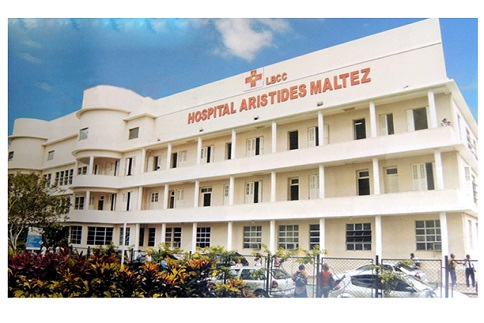
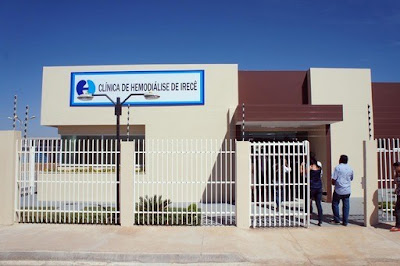
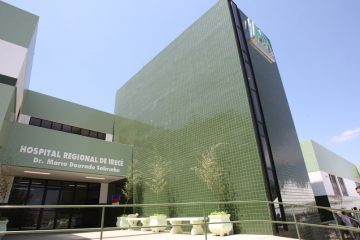
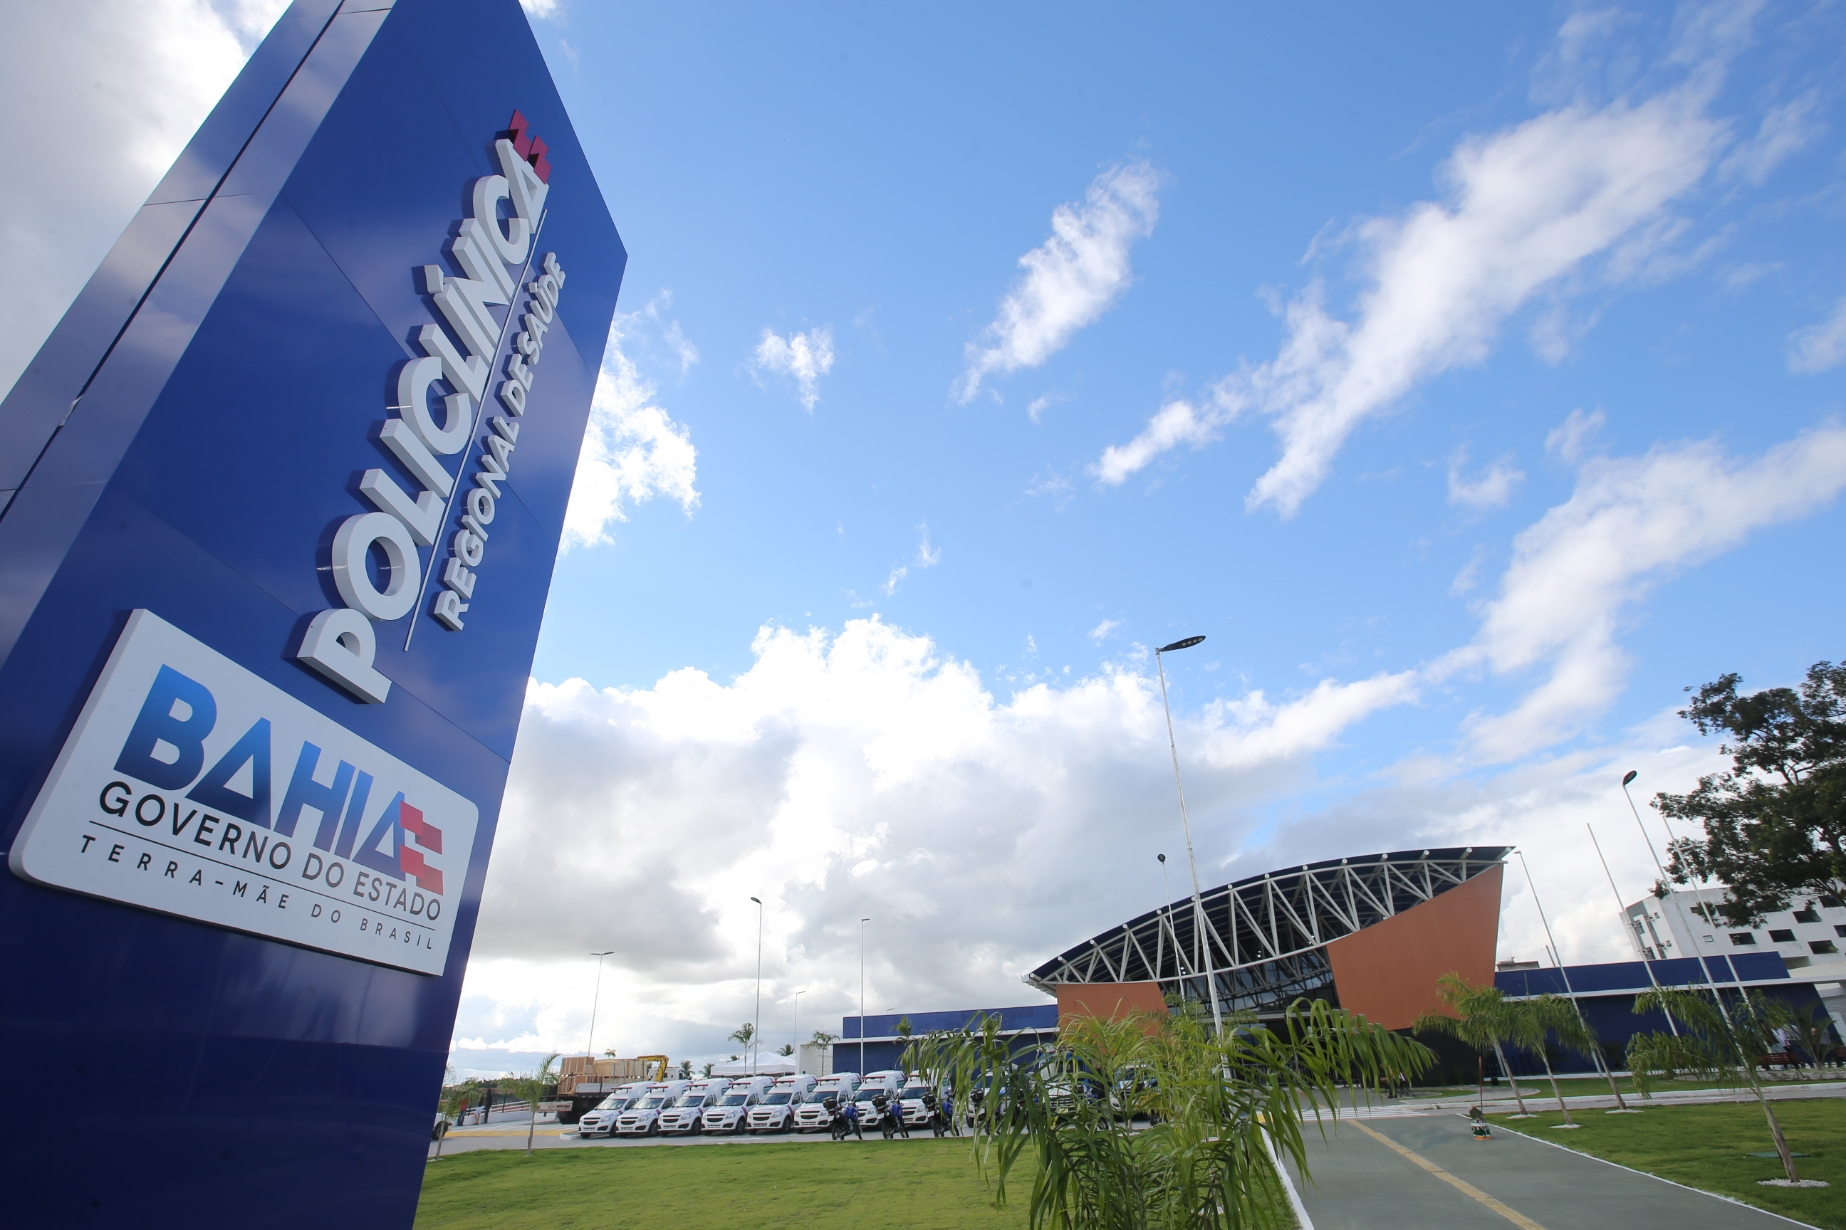
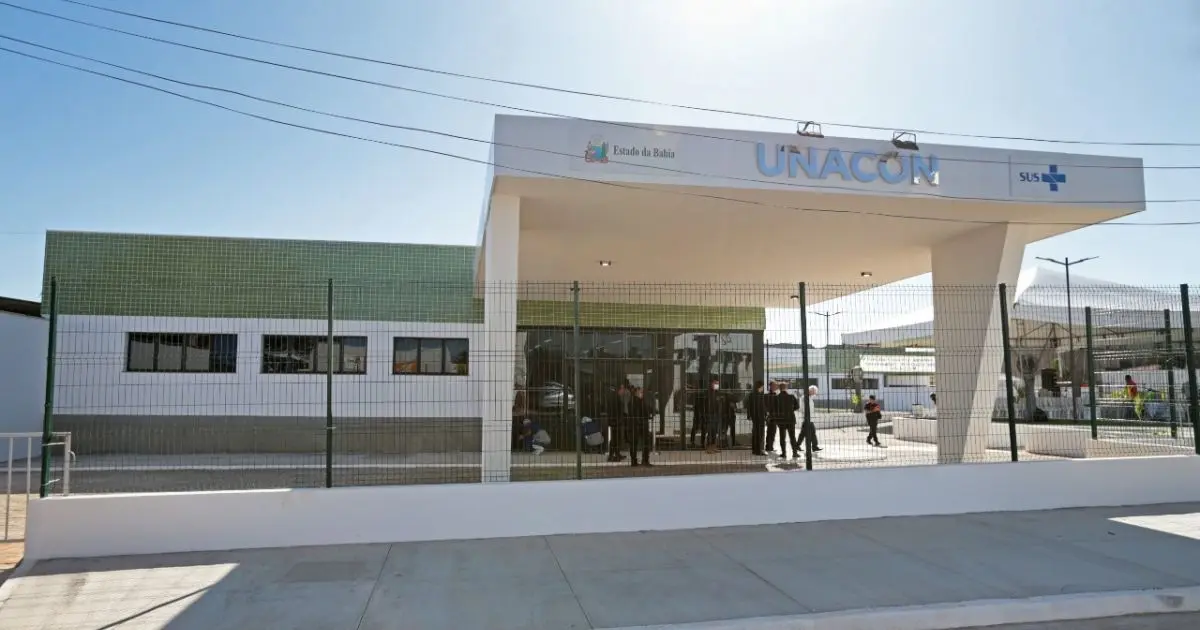
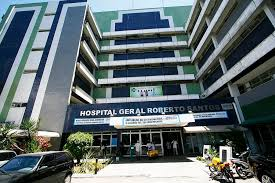
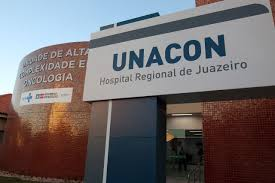
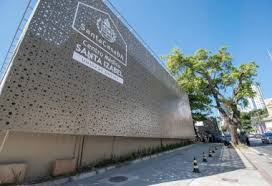
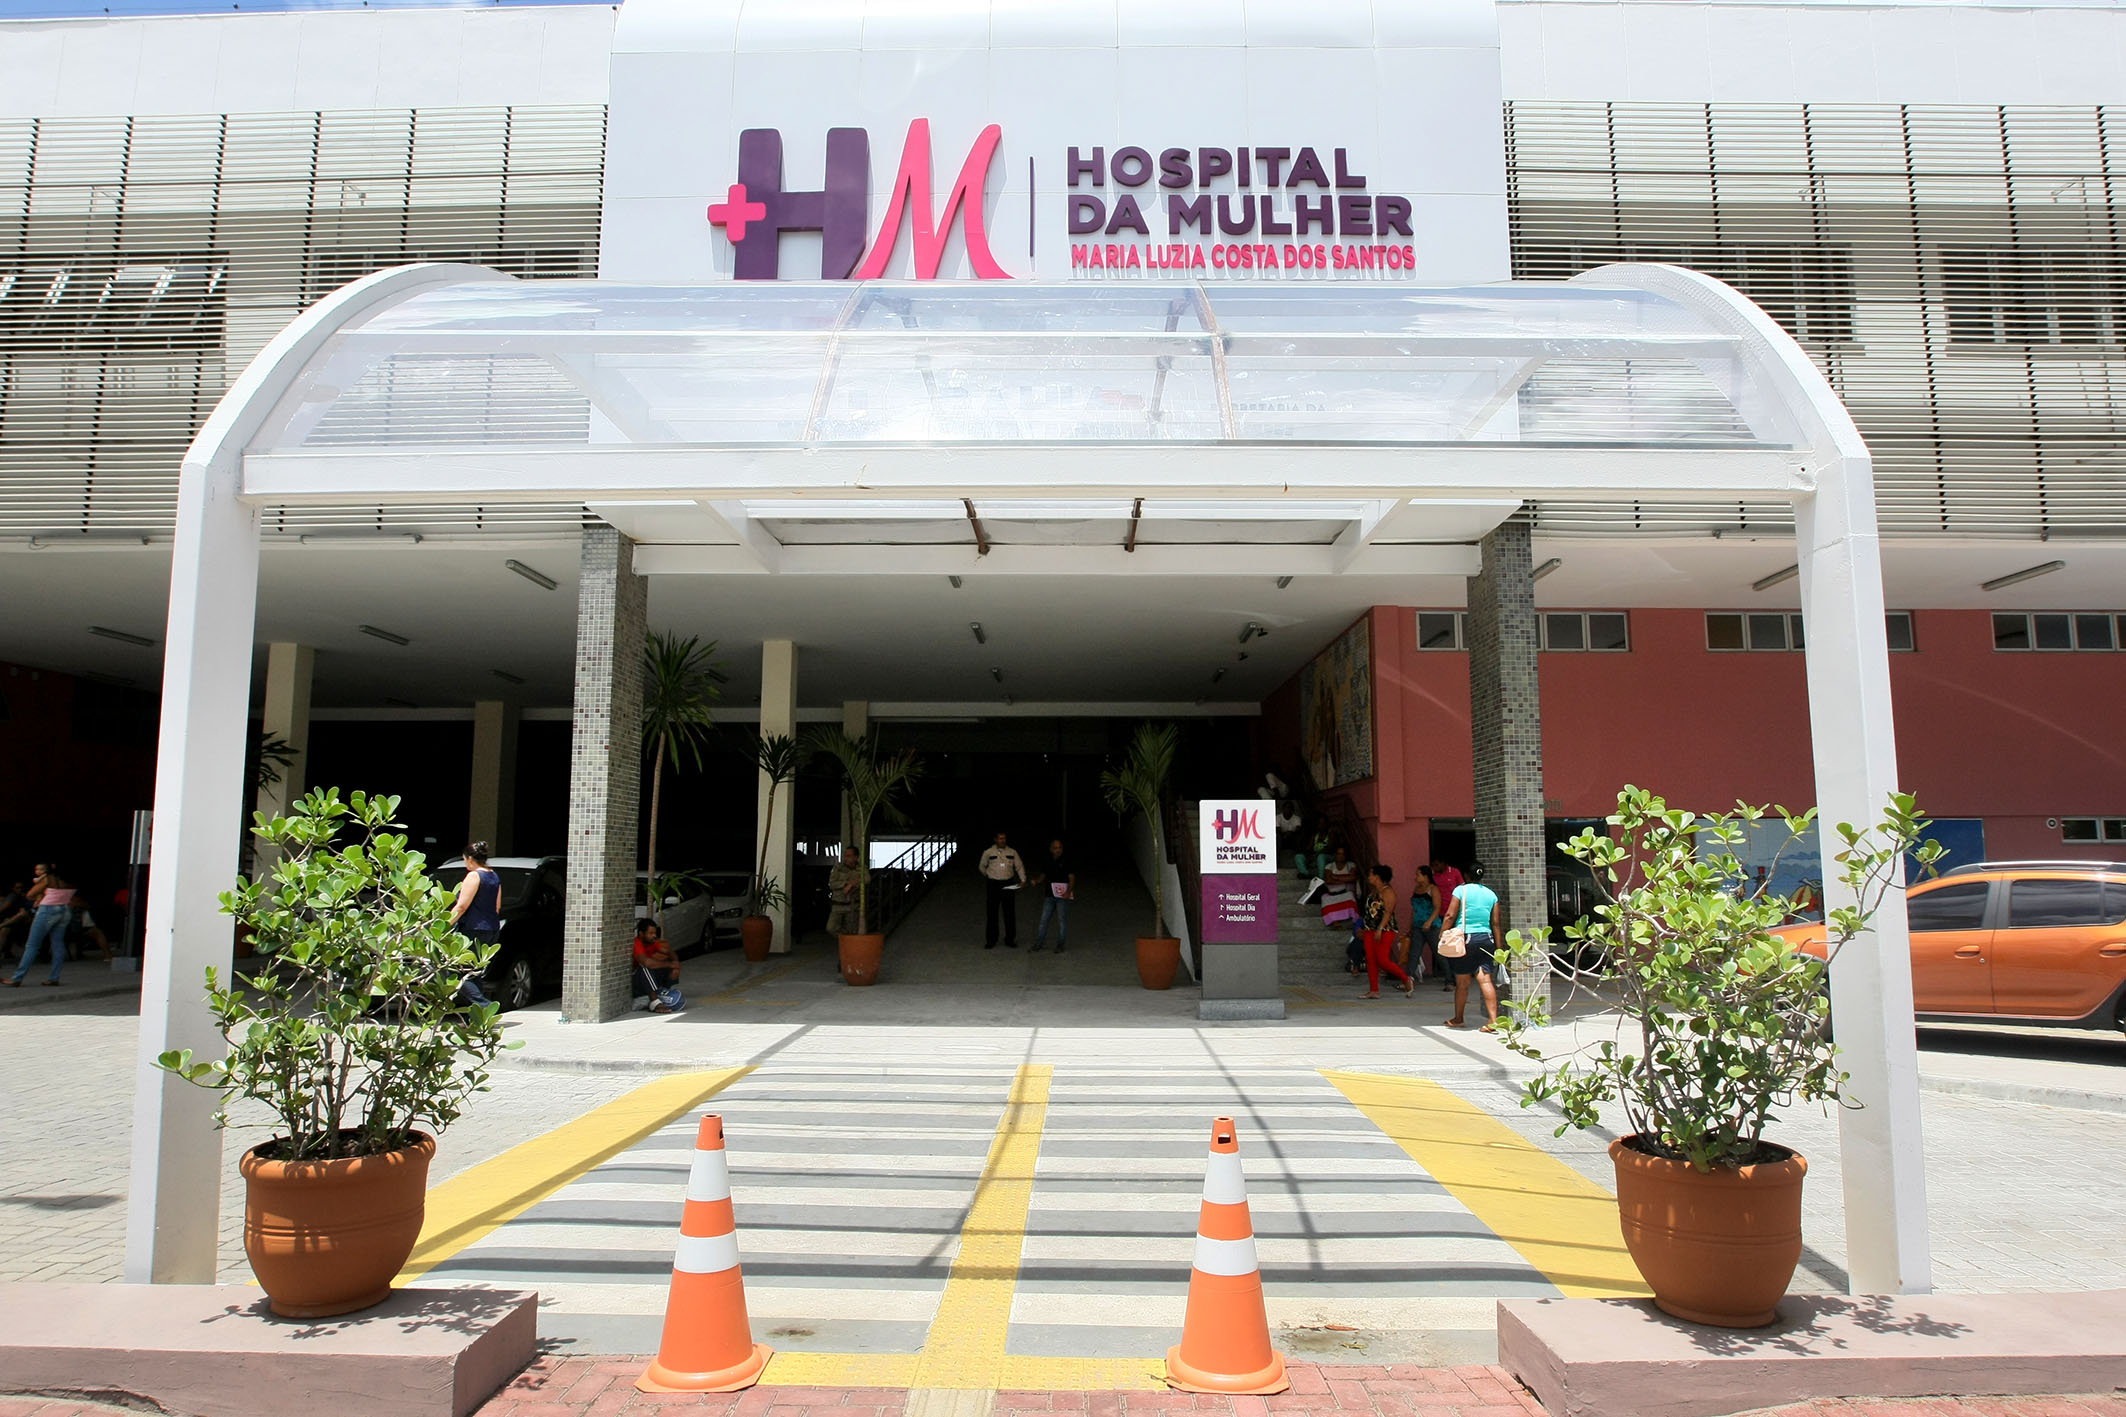
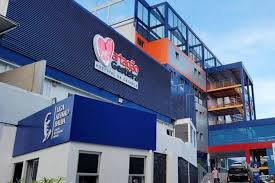
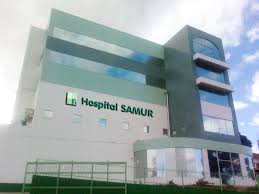
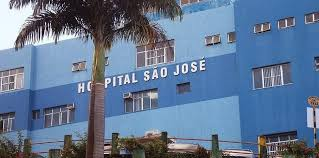
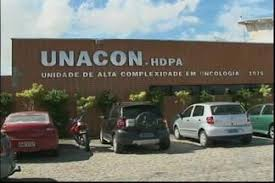

In [12]:
# @title 4.3.3 - Mapa da Distribuição dos Aparelhos de Saúde nas RS de Irecê e Jacobina { run: "auto" }
###
###
# Carregar o geodataframe de pontos
pts = Aparelhos_gdf_merged

#Carrega e une os geodataframes das RS
reg = Limites_gdf

# Calcular a latitude e longitude médias das geometrias no geodatarame
latitude_central = pts.geometry.y.mean()
longitude_central = pts.geometry.x.mean()

#Cria o mapa base com as RS
mapa = reg.explore('nome',
                           cmap='inferno',
                           tooltip='nome',
                           tooltip_kwds=dict(labels=False),
                           style_kwds=dict(color='black'),
                           legend=True,
                           legend_kwds=dict(caption='REGIÕES'),
                           name='nome'
                    )

# Adicionar um marcador ao mapa para cada aparelho no geodatarame
for idx, row in pts.iterrows():
    dir_imagem = DIR + '/Imagens/' + row['NM_ARQ']

    #Carrega a imagem que será usada no popup do marcador
    with open(dir_imagem, "rb") as imagem_arquivo:
        imagem_codificada = base64.b64encode(imagem_arquivo.read()).decode('utf-8')

    #Cria o cod. html com o conteúdo do popup
    html_popup = f"""
    <!DOCTYPE html>
    <html lang="pt-BR">
    <head>
        <meta charset="UTF-8">
        <title>Detalhes do Ponto de Saúde</title>
    </head>
    <body>
        <h4><b>{row['NM_PT']}</b></h4>
        <p><b>{row['CAT']}</b></p>
        <img src="data:image/jpg;base64,{imagem_codificada}" alt="Imagem do Ponto de Saúde" style="max-width:300px;">
        <p>Serviços: {row['SERVICOS']}</p>
    </body>
    </html>
    """
    #Cria o marcador do ponto
    folium.Marker(
        location=[row['geometry'].y,
                  row['geometry'].x
                  ],
        popup=folium.Popup(html_popup,
                           max_width=450
                           ),
        tooltip=row['NM_PT'],
        icon=folium.Icon(color=row['COR'],
                         icon_color='k',
                         icon=row['ICONE'],
                         prefix='fa'
                         ),
        draggable=True
    ).add_to(mapa)

# Exibir o mapa
mapa

In [14]:
#Salva o mapa gerado no formato .html
mapa.save(Saidas + '/MAPA.html')